In [2]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor

from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from sklearn import preprocessing

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-estate-dataset/data.csv


In [3]:
data = pd.read_csv("/kaggle/input/real-estate-dataset/data.csv")

df = data.copy()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
def Missing_Values(data):
    variable_name=[]
    total_value=[]
    total_missing_value=[]
    missing_value_rate=[]
    unique_value_list=[]
    total_unique_value=[]
    data_type=[]
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0],3))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))
    missing_data=pd.DataFrame({"Variable":variable_name,"Total_Value":total_value,\
                             "Total_Missing_Value":total_missing_value,"Missing_Value_Rate":missing_value_rate,
                             "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value})
    return missing_data.sort_values("Missing_Value_Rate",ascending=False)


a quick look at the data

In [5]:
Missing_Values(df)

,Variable,Total_Value,Total_Missing_Value,Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
5,RM,511,5,0.01,float64,"[6.575, 6.421, 7.185, 6.997999999999999, 7.147...",445
0,CRIM,511,0,0.00,float64,"[0.00632, 0.02731, 0.02729, 0.0323699999999999...",509
1,ZN,511,0,0.00,float64,"[18.0, 0.0, 12.5, 75.0, 21.0, 90.0, 85.0, 100....",26
2,INDUS,511,0,0.00,float64,"[2.31, 7.07, 2.18, 7.87, 8.14, 5.96, 2.95, 6.9...",79
3,CHAS,511,0,0.00,int64,"[0, 1]",2
4,NOX,511,0,0.00,float64,"[0.5379999999999999, 0.469, 0.4579999999999999...",82
6,AGE,511,0,0.00,float64,"[65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96....",357
7,DIS,511,0,0.00,float64,"[4.09, 4.9671, 6.0622, 5.5605, 5.9505, 6.0821,...",416
8,RAD,511,0,0.00,int64,"[1, 2, 3, 5, 4, 8, 6, 7, 24]",9
9,TAX,511,0,0.00,int64,"[296, 242, 222, 311, 307, 279, 252, 233, 243, ...",67


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,511.0,3.584139,8.564433,0.00632,0.082325,0.26169,3.621175,88.9762
ZN,511.0,11.252446,23.234838,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,511.0,11.151096,6.828175,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,511.0,0.068493,0.252838,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,511.0,0.554757,0.115310,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.287589,0.703802,3.56100,5.885500,6.20900,6.629750,8.7800
AGE,511.0,68.616243,28.099130,2.90000,45.050000,77.30000,94.050000,100.0000
DIS,511.0,3.783876,2.098631,1.12960,2.100350,3.15230,5.118000,12.1265
RAD,511.0,9.485323,8.688469,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,511.0,407.440313,167.903532,187.00000,279.500000,330.00000,666.000000,711.0000


In [7]:
df.drop("CHAS", axis = 1,inplace = True)

#### Handling outlier

Extreme Cleaning:
lower_threshold: Below the first quartile (Q1) − 3 ∗ interquartile range (IQR)
upper_threshold: Above the third quartile (Q3) + 3 ∗ interquartile range (IQR)
    
Standard Cleaning:
lower_threshold: Below the first quartile (Q1) − 1.5 ∗ interquartile range (IQR)
upper_threshold: Above the third quartile (Q3) + 1.5 ∗ interquartile range (IQR)
where 'IQR' is equal to [Q3-Q1]=[third_quartile - first_quartile]. This technique has disadvantages while dealing with sparse columns, since taking the middle lenght (75%-25%) may bring zero distanced IQR.


In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
IQR

CRIM         3.53885
ZN          12.50000
INDUS       12.91000
NOX          0.17500
RM           0.74425
AGE         49.00000
DIS          3.01765
RAD         20.00000
TAX        386.50000
PTRATIO      2.80000
B           21.50000
LSTAT       10.04000
MEDV         7.95000
dtype: float64

In [10]:
minn = Q1 - 3 * IQR
maxx = Q3 + 3 * IQR
out_lier = df[(df < minn)  | (df > maxx)].count()
out_lier

CRIM       34
ZN         45
INDUS       0
NOX         0
RM          1
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B          58
LSTAT       1
MEDV       18
dtype: int64

In [11]:
outlier_ratio  = out_lier/df.count()
outlier_ratio

CRIM       0.066536
ZN         0.088063
INDUS      0.000000
NOX        0.000000
RM         0.001976
AGE        0.000000
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.113503
LSTAT      0.001957
MEDV       0.035225
dtype: float64

In [12]:
df_out_lier_cleaned = df[~((df < minn)  | (df > maxx)).any(axis=1)]
df_out_lier_cleaned

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9
506,0.98765,0.0,12.50,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0


In [13]:
Missing_Values(df_out_lier_cleaned)

,Variable,Total_Value,Total_Missing_Value,Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
4,RM,371,5,0.013,float64,"[6.575, 6.421, 7.185, 6.997999999999999, 7.147...",330
0,CRIM,371,0,0.000,float64,"[0.00632, 0.02731, 0.02729, 0.0323699999999999...",371
1,ZN,371,0,0.000,float64,"[18.0, 0.0, 12.5, 21.0, 25.0, 17.5, 28.0, 45.0...",15
2,INDUS,371,0,0.000,float64,"[2.31, 7.07, 2.18, 7.87, 8.14, 5.96, 6.91, 5.6...",52
3,NOX,371,0,0.000,float64,"[0.5379999999999999, 0.469, 0.4579999999999999...",64
5,AGE,371,0,0.000,float64,"[65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96....",289
6,DIS,371,0,0.000,float64,"[4.09, 4.9671, 6.0622, 5.5605, 5.9505, 6.0821,...",302
7,RAD,371,0,0.000,int64,"[1, 2, 3, 5, 4, 8, 6, 7, 24]",9
8,TAX,371,0,0.000,int64,"[296, 242, 222, 311, 307, 279, 233, 243, 284, ...",43
9,PTRATIO,371,0,0.000,float64,"[15.3, 17.8, 18.7, 15.2, 21.0, 19.2, 17.9, 16....",36


Fill na values

In [14]:
df_out_lier_cleaned["RM"] = df_out_lier_cleaned["RM"].fillna((df_out_lier_cleaned["RM"].median()))

In [15]:
Missing_Values(df_out_lier_cleaned)

,Variable,Total_Value,Total_Missing_Value,Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
0,CRIM,371,0,0.0,float64,"[0.00632, 0.02731, 0.02729, 0.0323699999999999...",371
1,ZN,371,0,0.0,float64,"[18.0, 0.0, 12.5, 21.0, 25.0, 17.5, 28.0, 45.0...",15
2,INDUS,371,0,0.0,float64,"[2.31, 7.07, 2.18, 7.87, 8.14, 5.96, 6.91, 5.6...",52
3,NOX,371,0,0.0,float64,"[0.5379999999999999, 0.469, 0.4579999999999999...",64
4,RM,371,0,0.0,float64,"[6.575, 6.421, 7.185, 6.997999999999999, 7.147...",330
5,AGE,371,0,0.0,float64,"[65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96....",289
6,DIS,371,0,0.0,float64,"[4.09, 4.9671, 6.0622, 5.5605, 5.9505, 6.0821,...",302
7,RAD,371,0,0.0,int64,"[1, 2, 3, 5, 4, 8, 6, 7, 24]",9
8,TAX,371,0,0.0,int64,"[296, 242, 222, 311, 307, 279, 233, 243, 284, ...",43
9,PTRATIO,371,0,0.0,float64,"[15.3, 17.8, 18.7, 15.2, 21.0, 19.2, 17.9, 16....",36


In [16]:
df_out_lier_cleaned.corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.243737,0.516641,0.608320,-0.164074,0.396952,-0.432181,0.873149,0.789443,0.295453,-0.198411,0.403168,-0.386990
ZN,-0.243737,1.000000,-0.433441,-0.399924,0.290192,-0.408186,0.506619,-0.198017,-0.273371,-0.371079,0.130698,-0.344852,0.357976
INDUS,0.516641,-0.433441,1.000000,0.690190,-0.378374,0.514232,-0.609405,0.480464,0.670788,0.335203,-0.306185,0.550712,-0.522982
NOX,0.608320,-0.399924,0.690190,1.000000,-0.252792,0.657836,-0.729035,0.544274,0.628235,0.074785,-0.311950,0.499469,-0.390648
RM,-0.164074,0.290192,-0.378374,-0.252792,1.000000,-0.162515,0.133852,-0.076492,-0.208697,-0.225432,0.118578,-0.606164,0.767323
AGE,0.396952,-0.408186,0.514232,0.657836,-0.162515,1.000000,-0.667074,0.309870,0.398969,0.154542,-0.182189,0.541904,-0.374325
DIS,-0.432181,0.506619,-0.609405,-0.729035,0.133852,-0.667074,1.000000,-0.350244,-0.455871,-0.123000,0.219100,-0.409944,0.215821
RAD,0.873149,-0.198017,0.480464,0.544274,-0.076492,0.309870,-0.350244,1.000000,0.866226,0.334730,-0.208609,0.279659,-0.283524
TAX,0.789443,-0.273371,0.670788,0.628235,-0.208697,0.398969,-0.455871,0.866226,1.000000,0.373619,-0.281396,0.400822,-0.443211
PTRATIO,0.295453,-0.371079,0.335203,0.074785,-0.225432,0.154542,-0.123000,0.334730,0.373619,1.000000,0.005047,0.274207,-0.461828


Let's apply train test split to data

In [17]:
X = df_out_lier_cleaned.drop("CRIM", axis = 1)
y = df_out_lier_cleaned["CRIM"]
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

x_train_shape = X_train.shape
x_test_shape = X_test.shape
y_train_shape = y_train.shape
y_test_shape = y_test.shape

print("X train shape: {}\nX test shape: {}\n\ny train shape: {}\ny test shape: {}".format(x_train_shape, x_test_shape, y_train_shape, y_test_shape))

X train shape: (296, 13)
X test shape: (75, 13)

y train shape: (296,)
y test shape: (75,)


# Linear Regression Assumptions

## * Linearity 
## * Normality of the Error Terms 
## * No Multicollinearity among Predictors 
## * No Autocorrelation of the Error Terms
## * Homoscedasticity

In [19]:
lin_reg = LinearRegression()
lin_reg_model = lin_reg.fit(X_train, y_train)

y_pred = lin_reg_model.predict(X_test)


test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
test_set_r2 = r2_score(y_test, y_pred)

print("R2: {}\nRMSE: {}".format(test_set_r2, test_set_rmse))

R2: 0.7973684609574166
RMSE: 1.3005835277810907


### Linearity

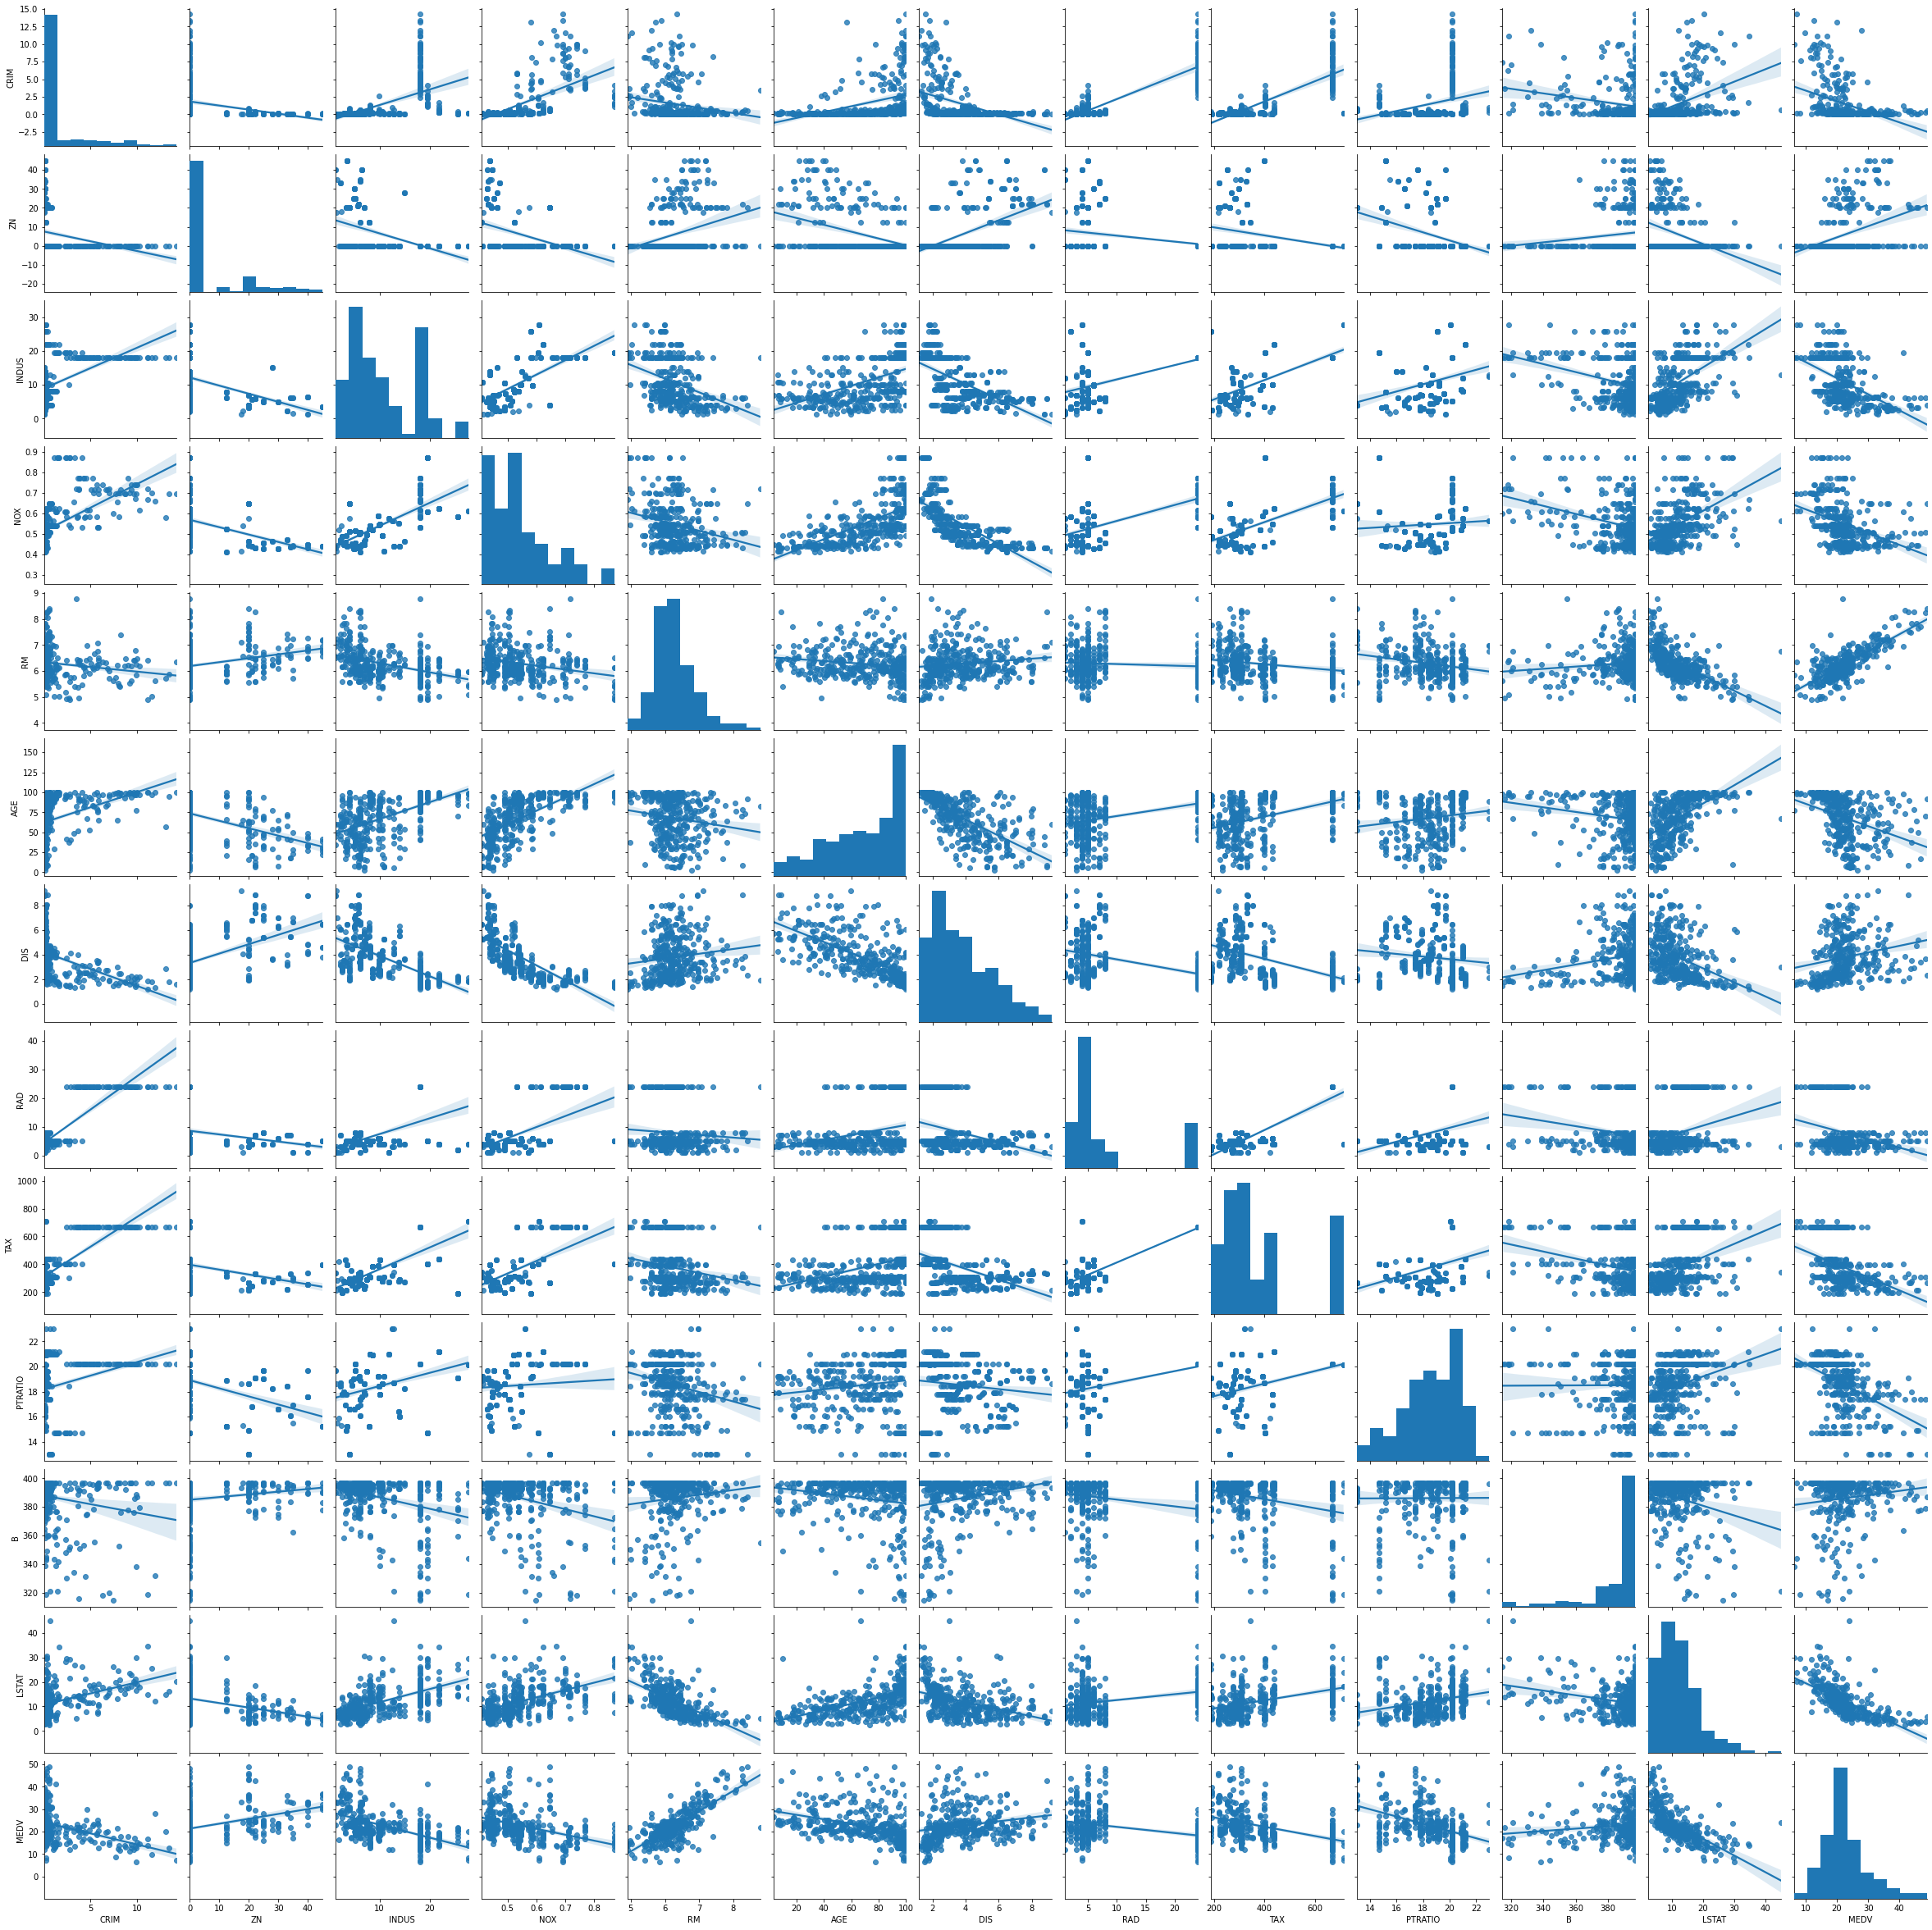

In [20]:
sns.pairplot(df_out_lier_cleaned, kind = "reg")

### Normality of the Error Terms

In [21]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')
        
        
        
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results        

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


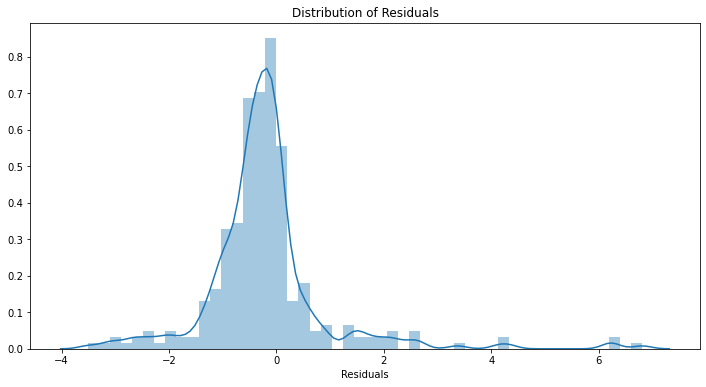


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [22]:
normal_errors_assumption(lin_reg_model, X_train, y_train)

### No Multicollinearity among Predictors

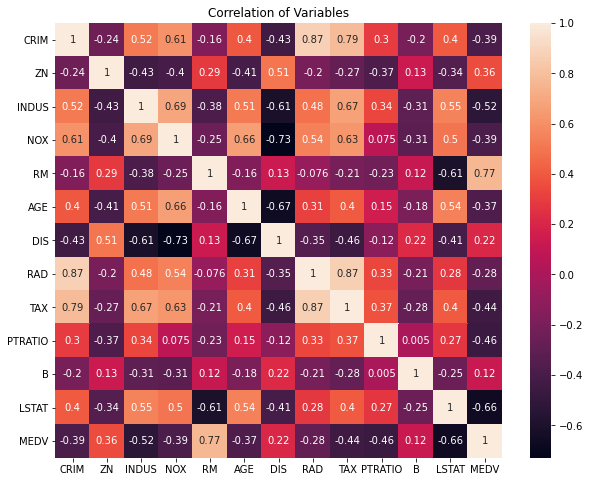

In [23]:
plt.figure(figsize = (10,8))
sns.heatmap(pd.DataFrame(df_out_lier_cleaned).corr(), annot=True)
plt.title('Correlation of Variables')
plt.show()

In [24]:
def variance_inflation_factor(exog, exog_idx):
    """
    exog : ndarray, (nobs, k_vars)
        design matrix with all explanatory variables, as for example used in
        regression
    exog_idx : int
        index of the exogenous variable in the columns of exog
    """
    k_vars = exog.shape[1]
    x_i = exog[:, exog_idx]
    mask = np.arange(k_vars) != exog_idx
    x_noti = exog[:, mask]
    r_squared_i = sm.OLS(x_i, x_noti).fit().rsquared
    vif = 1. / (1. - r_squared_i)
    return vif

def calculate_vif_(X, thresh=10.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [25]:
calculate_vif_(X_train)

dropping 'const' at index: 0
dropping 'RM' at index: 3
dropping 'B' at index: 8
dropping 'NOX' at index: 2
dropping 'PTRATIO' at index: 6
dropping 'TAX' at index: 5
dropping 'AGE' at index: 2
Remaining variables:
Index(['ZN', 'INDUS', 'DIS', 'RAD', 'LSTAT', 'MEDV'], dtype='object')


,ZN,INDUS,DIS,RAD,LSTAT,MEDV
234,0.0,6.20,3.6519,8,8.05,29.0
88,0.0,3.41,3.4217,2,5.50,23.6
97,0.0,2.89,3.4952,2,4.21,38.7
497,0.0,9.69,2.8927,6,14.10,18.3
16,0.0,8.14,4.4986,4,6.58,23.1
...,...,...,...,...,...,...
84,0.0,4.49,4.7794,3,9.62,23.9
120,0.0,25.65,2.2577,2,14.37,22.0
330,0.0,3.24,5.8736,4,9.09,19.8
486,0.0,18.10,3.5459,24,14.98,19.1


In [26]:
X = df_out_lier_cleaned.drop(["CRIM","RM", "B", "NOX", "PTRATIO", "TAX", "AGE"], axis = 1)
y = df_out_lier_cleaned["CRIM"]
#X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

x_train_shape = X_train.shape
x_test_shape = X_test.shape
y_train_shape = y_train.shape
y_test_shape = y_test.shape

print("X train shape: {}\nX test shape: {}\n\ny train shape: {}\ny test shape: {}".format(x_train_shape, x_test_shape, y_train_shape, y_test_shape))

X train shape: (296, 6)
X test shape: (75, 6)

y train shape: (296,)
y test shape: (75,)


In [27]:
ols_model = sm.OLS(y_train, X_train)
ols_results = ols_model.fit()
print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   CRIM   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.846
Method:                 Least Squares   F-statistic:                              271.5
Date:                Mon, 16 Nov 2020   Prob (F-statistic):                   7.64e-116
Time:                        20:28:32   Log-Likelihood:                         -479.22
No. Observations:                 296   AIC:                                      970.4
Df Residuals:                     290   BIC:                                      992.6
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Dropped ZN and INDUS because P value bigger than 0.05 so they do not contribute significantly to the model

In [28]:
X = df_out_lier_cleaned.drop(["CRIM","RM", "B", "NOX", "PTRATIO", "TAX", "AGE", "INDUS", "ZN"], axis = 1)
y = df_out_lier_cleaned["CRIM"]
#X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

x_train_shape = X_train.shape
x_test_shape = X_test.shape
y_train_shape = y_train.shape
y_test_shape = y_test.shape

print("X train shape: {}\nX test shape: {}\n\ny train shape: {}\ny test shape: {}".format(x_train_shape, x_test_shape, y_train_shape, y_test_shape))

X train shape: (296, 4)
X test shape: (75, 4)

y train shape: (296,)
y test shape: (75,)


In [32]:
ols_model = sm.OLS(y_train, X_train)
ols_results = ols_model.fit()
y_pred = ols_results.predict(X_test)

# calc rmse
ols_rmse = rmse(y_test, y_pred)

print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   CRIM   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                              409.2
Date:                Mon, 16 Nov 2020   Prob (F-statistic):                   2.47e-118
Time:                        20:29:54   Log-Likelihood:                         -479.50
No. Observations:                 296   AIC:                                      967.0
Df Residuals:                     292   BIC:                                      981.8
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [33]:
ols_rmse

1.3434223430337366

### No Autocorrelation of the Error Terms

In [34]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [36]:
autocorrelation_assumption(ols_results, X_train, y_train)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.8934876140135515
Little to no autocorrelation 

Assumption satisfied


### Homoscedasticity

In [37]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


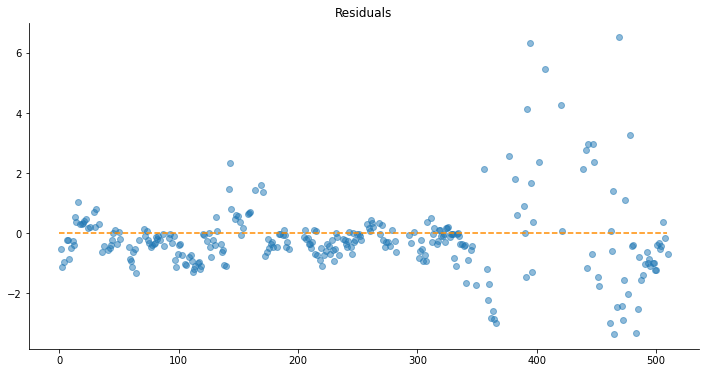

In [38]:
homoscedasticity_assumption(ols_results, X_train, y_train)

**We have to solve the  normal errorr assumption**

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


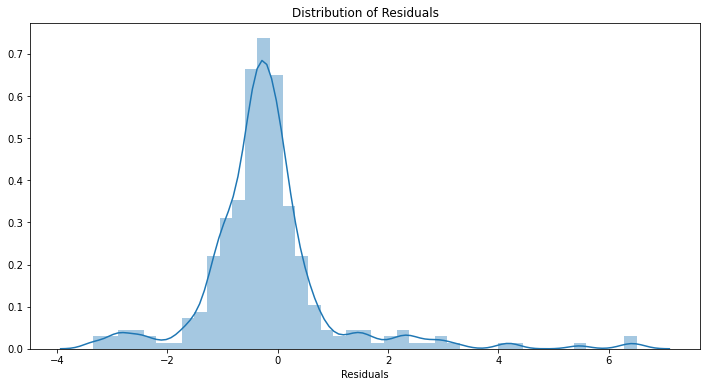


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [39]:
normal_errors_assumption(ols_results, X_train, y_train)

Some functions belong to **Jeff Macaluso**


I wonder your thoughts about the notebook

The notebook will be updated in the future